In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import h5py

# Open the HDF5 file
with h5py.File('/content/drive/MyDrive/Tuomaomao/eye_closed2023.11.29_11.05.35.hdf5', 'r') as file:
    # List all datasets in the file
    print("Datasets:")
    def print_name(name):
        print(name)
    file.visit(print_name)

Datasets:
AsynchronData
AsynchronData/AsynchronSignalTypes
RawData
RawData/AcquisitionTaskDescription
RawData/DAQDeviceCapabilities
RawData/DAQDeviceDescription
RawData/Samples
RawData/SessionDescription
RawData/SubjectDescription
SavedFeatues
SavedFeatues/NumberOfFeatures
Version
Version/Version


In [3]:
# Function to recursively print content of a group
def print_group_content(group_name, group):
    print("Group:", group_name)
    print("Content:")
    # Iterate over all items (datasets and subgroups) in the group
    group.visititems(print_item_content)
    print("")

# Function to print content of a dataset
def print_dataset_content(dataset_name, dataset):
    print("Dataset:", dataset_name)
    print("Content:")
    print(dataset[()])  # Print the content of the dataset
    print("")

# Function to print content of a dataset or group
def print_item_content(name, item):
    if isinstance(item, h5py.Dataset):
        print_dataset_content(name, item)
    elif isinstance(item, h5py.Group):
        print_group_content(name, item)

# Open the HDF5 file
with h5py.File('/content/drive/MyDrive/Tuomaomao/eye_closed2023.11.29_11.05.35.hdf5', 'r') as file:
    # Iterate over all items (datasets and groups) in the file
    file.visititems(print_item_content)

Group: AsynchronData
Content:
Dataset: AsynchronSignalTypes
Content:
[b'<?xml version="1.0" encoding="utf-8" ?>\n<ArrayOfAsynchronSignalDescription xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">\n  <AsynchronSignalDescription>\n    <IsCombinedSignal>false</IsCombinedSignal>\n    <Name>g</Name>\n    <IsToggleSignal>true</IsToggleSignal>\n    <IsTrigger>false</IsTrigger>\n    <IsEnabled>true</IsEnabled>\n    <ID>0</ID>\n    <Edge>RaisingEdge</Edge>\n    <Description>GO</Description>\n    <Direction>In</Direction>\n    <Color>-16711936</Color>\n    <ChannelNumber>0</ChannelNumber>\n    <SourceDevice>\n      <DeviceSerial>Version 1.0</DeviceSerial>\n      <SourceType>KeyBoard</SourceType>\n    </SourceDevice>\n  </AsynchronSignalDescription>\n  <AsynchronSignalDescription>\n    <IsCombinedSignal>false</IsCombinedSignal>\n    <Name>s</Name>\n    <IsToggleSignal>true</IsToggleSignal>\n    <IsTrigger>false</IsTrigger>\n    <IsEnabled>true</

(184338, 15)


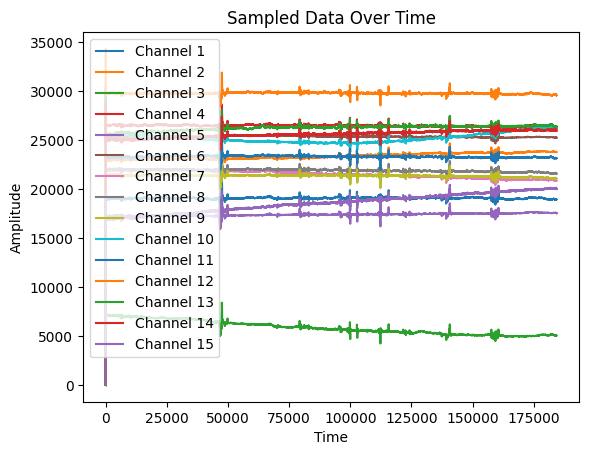

In [11]:
import matplotlib.pyplot as plt

# Open the HDF5 file
with h5py.File('/content/drive/MyDrive/Tuomaomao/eye_closed2023.11.29_11.05.35.hdf5', 'r') as file:
    # Access the dataset "RawData/Samples"
    dataset = file['RawData/Samples']

    # Get the content of the dataset
    data = dataset[:]

    # Get the number of samples and channels
    num_samples, num_channels = data.shape
    print(data.shape) # 15 channels in total

    # Create a time array (assuming a sampling rate of 1 Hz)
    time = range(num_samples)  # assuming time starts from 0 and increments by 1 and the sampling rate is 1
    # time = np.arange(num_samples) / 256  # for a sampling rate of 256 Hz

    # Plot each channel over time
    for channel in range(num_channels):
        plt.plot(time, data[:, channel], label=f'Channel {channel + 1}')

    # Add labels and legend
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Sampled Data Over Time')
    plt.legend()

    # Show the plot
    plt.show()

In [ ]:
# [[1.5006785e-04 1.7127975e-04 8.0957063e-05 ... 1.7237270e-04
#   1.5515914e-04 1.2309238e-04]
#  [5.6232344e-03 6.4778817e-03 2.9812653e-03 ... 6.8578599e-03
#   6.5214997e-03 4.9386853e-03]
#  [7.5414017e-02 8.7021783e-02 4.0063474e-02 ... 9.3413480e-02
#   9.0153381e-02 6.7594990e-02]
#  ...
#  [1.8946773e+04 2.3798143e+04 5.0404556e+03 ... 2.6412916e+04
#   2.5995621e+04 2.0036957e+04]
#  [1.8946434e+04 2.3797639e+04 5.0400854e+03 ... 2.6411695e+04
#   2.5993738e+04 2.0034852e+04]
#  [1.8946123e+04 2.3797256e+04 5.0397681e+03 ... 2.6410531e+04
#   2.5991793e+04 2.0032676e+04]]

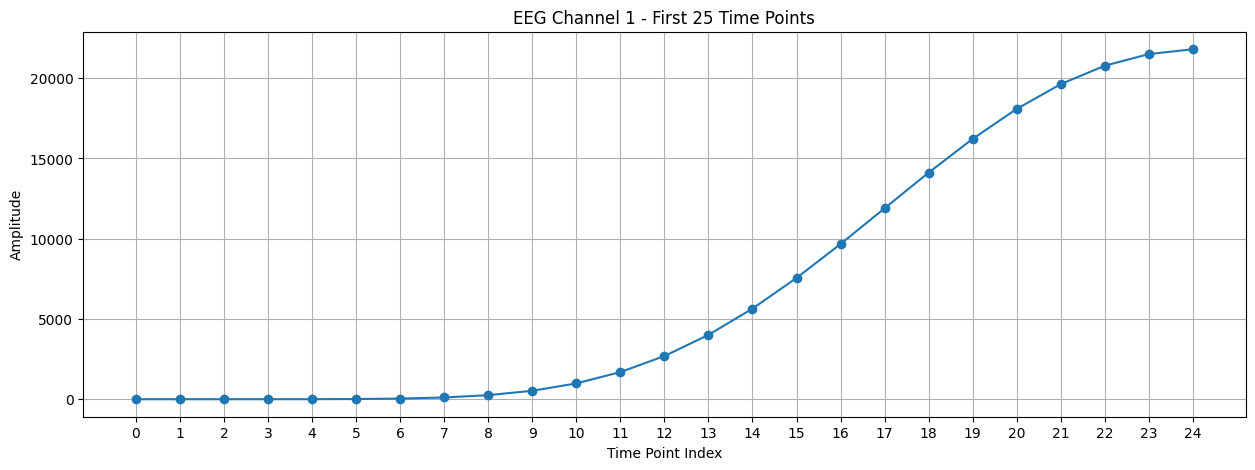

In [13]:
import numpy as np

# Path to the HDF5 file
file_path = '/content/drive/MyDrive/Tuomaomao/eye_closed2023.11.29_11.05.35.hdf5'

# Extracting the EEG signal data from the 'Samples' dataset
with h5py.File(file_path, 'r') as file:
    # Access the EEG data within the 'Samples' dataset
    eeg_data = np.array(file['RawData']['Samples'])

# Plot the first channel of the EEG data for the first 25 time points with an expanded x-axis
plt.figure(figsize=(15, 5))
plt.plot(range(25), eeg_data[:25, 0], marker='o', linestyle='-')  # Notice the swapped indices
plt.title('EEG Channel 1 - First 25 Time Points')
plt.xlabel('Time Point Index')
plt.ylabel('Amplitude')
plt.xticks(range(25))  # Set x-ticks to show each time point index up to 25
plt.grid(True)  # Add a grid for better readability
plt.show()

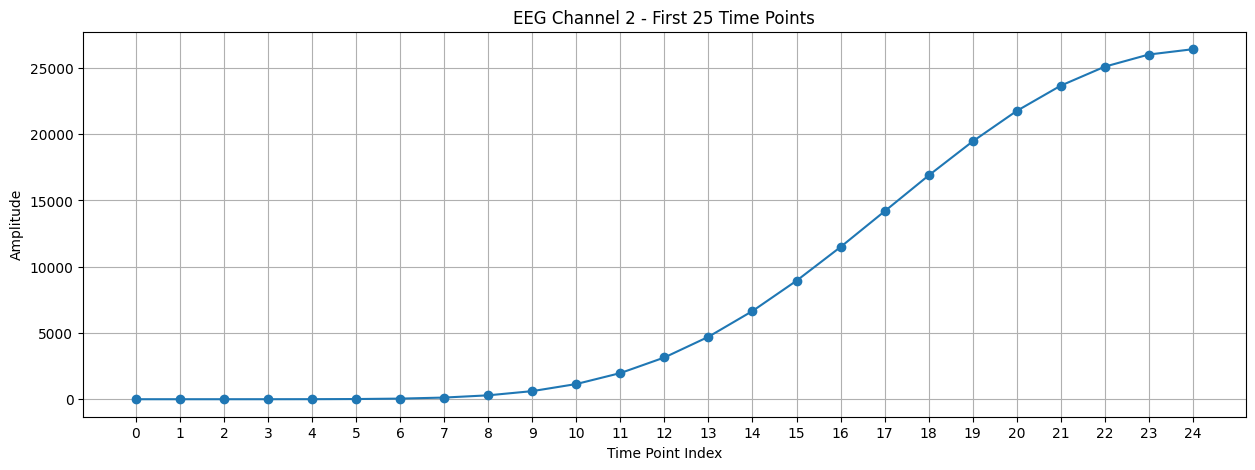

In [15]:
# Plot the first channel of the EEG data for the first 25 time points with an expanded x-axis
plt.figure(figsize=(15, 5))
plt.plot(range(25), eeg_data[:25, 1], marker='o', linestyle='-')  # Notice the swapped indices
plt.title('EEG Channel 2 - First 25 Time Points')
plt.xlabel('Time Point Index')
plt.ylabel('Amplitude')
plt.xticks(range(25))  # Set x-ticks to show each time point index up to 25
plt.grid(True)  # Add a grid for better readability
plt.show()